# ***HITO 1: Carga de Dataset y Lectura de columnas***

### **1.1 Explicación del dataset**
Este dataset contiene información académica y socioeducativa de estudiantes de enseñanza media, y está compuesto por registros individuales de alumnos correspondientes a un período académico anual. La base de datos fue recopilada con el objetivo de analizar cómo distintas variables, como hábitos de estudio, asistencia a clases y contexto familiar, influyen en el rendimiento académico final de los estudiantes.

El dataset permite explorar relaciones entre las características de los estudiantes y su desempeño académico, y sirve como base para el desarrollo de un modelo de Machine Learning orientado a la predicción del promedio final.

In [ ]:
# Importar las librerías necesarias para poder trabajar el dataset
import pandas as pd

In [ ]:
# Lectura de dataset a trabajar
df = pd.read_csv('https://raw.githubusercontent.com/tatosepulveda/PROYECTO/refs/heads/main/01database.csv')
df

### **1.2 Explicación columnas del dataset**
### **promedio_final**

La columna promedio_final representa el promedio anual obtenido por el estudiante, medido en una escala de 1.0 a 7.0.
Es una variable numérica continua y constituye el principal objetivo del análisis, ya que permite evaluar el nivel de desempeño académico alcanzado.

El tipo de dato es FLOAT (número decimal), con valores típicos que oscilan entre 1.0 y 7.0. El valor mínimo observado corresponde a estudiantes con bajo rendimiento, mientras que el valor máximo representa un desempeño académico sobresaliente.
(Se puede complementar con análisis de media, mediana, moda y desviación estándar).

### **horas_estudio**

La columna horas_estudio indica el número promedio de horas que el estudiante dedica semanalmente al estudio fuera del horario escolar.
Es una variable numérica entera (INT) cuyos valores comunes se encuentran entre 1 y 25 horas semanales.

Esta variable es relevante, ya que permite analizar la relación entre el tiempo dedicado al estudio y el rendimiento académico final.

### **asistencia**

La columna asistencia representa el porcentaje de asistencia del estudiante a clases durante el período académico.
Es una variable numérica (FLOAT) expresada en valores porcentuales que generalmente oscilan entre 60% y 100%.

La asistencia es un factor clave en el desempeño académico, dado que una mayor presencia en clases suele asociarse a mejores resultados.

### **inasistencias**

La columna inasistencias corresponde al número total de clases a las que el estudiante no asistió durante el año académico.
Es una variable numérica discreta (INT), con valores mínimos cercanos a 0 y máximos que pueden superar las 30 inasistencias.

Esta variable permite analizar el impacto de la ausencia reiterada en el rendimiento académico.

### **internet**

La columna internet indica si el estudiante cuenta con acceso a internet en su hogar.
Es una variable categórica binaria codificada numéricamente, donde:

0 representa No

1 representa Sí

El acceso a internet puede influir en las oportunidades de aprendizaje, especialmente en actividades de investigación y apoyo escolar.

### **educacion_padres**

La columna educacion_padres representa el nivel educativo más alto alcanzado por los padres o tutores del estudiante.
Es una variable categórica ordinal (INT), donde los valores típicos son:

1: Educación básica

2: Educación media

3: Educación técnica

4: Educación universitaria

Este factor se utiliza para analizar la influencia del entorno familiar en el rendimiento académico.

### **tipo_colegio**

La columna tipo_colegio indica el tipo de establecimiento educacional al que asiste el estudiante.
Es una variable categórica binaria codificada numéricamente, donde:

0 corresponde a establecimiento público

1 corresponde a establecimiento privado

Esta variable permite comparar diferencias de rendimiento entre distintos tipos de instituciones educativas.

In [ ]:
# Mostrar la variable objetivo
df['promedio_final']

# ***HITO 2: Análisis, Preprocesamiento y Entrenamiento***

### **2.1 Análisis**

In [ ]:
# Estadística Descriptiva, Distribución de los datos #

print("Primeras filas del dataset:")
print(df.head())
print("\nTamaño del dataset (filas, columnas):")
print(df.shape)
print("\nInformación del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())
print("\nValor más frecuente por cada columna:")
print(df.mode().iloc[0])

Primeras filas del dataset:
   horas_estudio  asistencia  inasistencias  internet  educacion_padres  \
0              7        88.6              5         1                 3   
1             20        90.4              4         1                 2   
2             15        94.5              8         1                 2   
3             11        90.9              3         0                 1   
4              8        76.7              4         0                 2   

   tipo_colegio  promedio_final  
0             0            4.81  
1             0            5.88  
2             1            5.70  
3             0            3.69  
4             1            4.45  

Tamaño del dataset (filas, columnas):
(655, 7)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudio     655 non-null    int64 

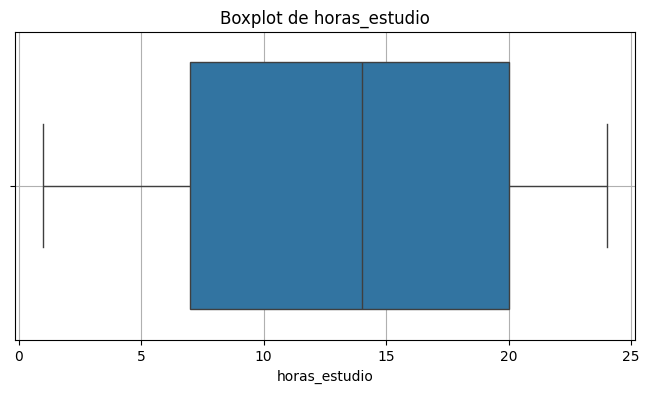

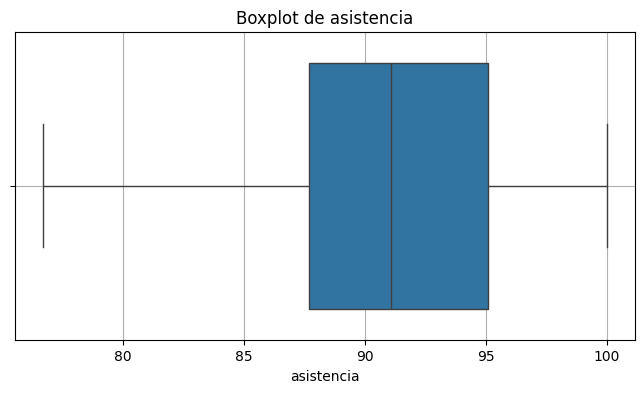

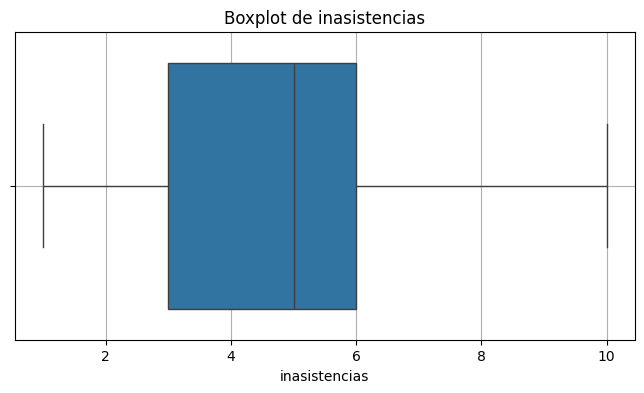

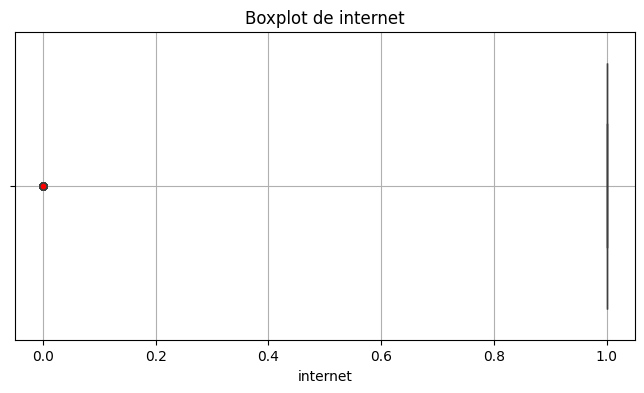

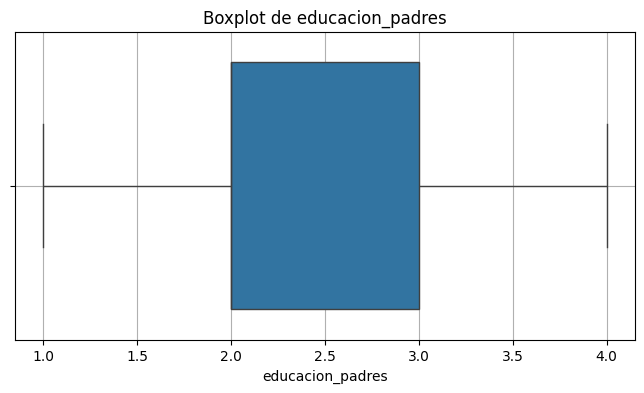

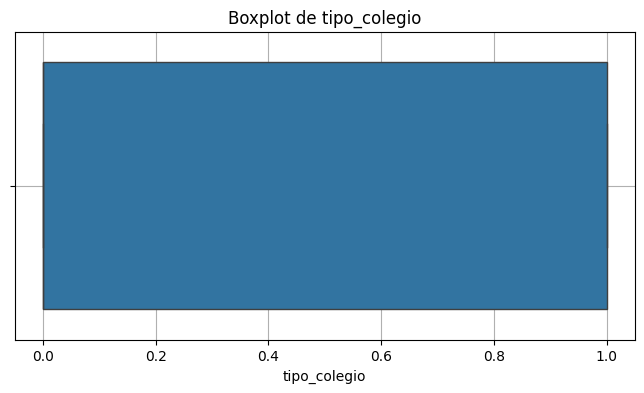

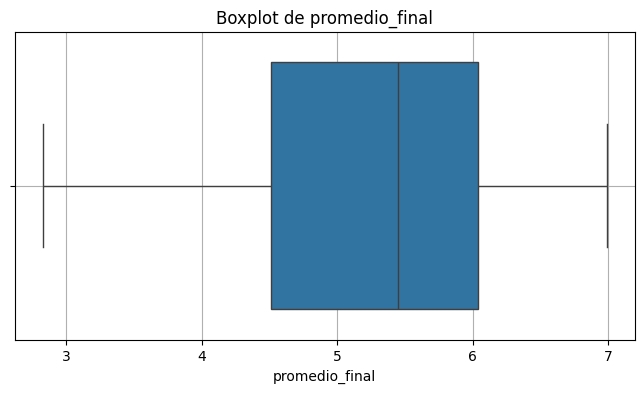

In [ ]:
# Gráficos

# Importar librerias para representar los datos a través de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar todas las columnas (todas son numéricas)
numeric_cols = df.columns

# Dando un poco de edición para valores outliers que aparezcan en los boxplots
outlier_style = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Graficar un boxplot por cada columna
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], flierprops=outlier_style)
    plt.title(f'Boxplot de {col}')
    plt.grid(True)
    plt.show()

In [ ]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# Histogramas
df.hist(figsize=(10, 8))
plt.suptitle('Histogramas de las características educativas')
plt.show()

### **2.2 Preprocesamiento de los datos**

In [ ]:
# Eliminar duplicados

print(f"Cantidad de filas duplicadas: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Filas después de eliminar duplicados: {len(df)}")

Cantidad de filas duplicadas: 2
Filas después de eliminar duplicados: 653


In [ ]:
# Ver valores faltantes x columna
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
horas_estudio       0
asistencia          0
inasistencias       0
internet            0
educacion_padres    0
tipo_colegio        0
promedio_final      0
dtype: int64


In [ ]:
# En este caso no hay valores nulos, pero si los hubiera, eliminaríamos las filas con valores nulos
# df = df.dropna(axis=0)
print("Dataset limpio (sin valores nulos):")
print(df.shape)

Dataset limpio (sin valores nulos):
(653, 7)


In [ ]:
# Verificar tipos de datos
print("Tipos de datos de cada columna:")
print(df.dtypes)

Tipos de datos de cada columna:
horas_estudio         int64
asistencia          float64
inasistencias         int64
internet              int64
educacion_padres      int64
tipo_colegio          int64
promedio_final      float64
dtype: object


In [ ]:
# Transformar datos categóricos (en este caso, todas las variables son numéricas)
# internet, educacion_padres y tipo_colegio son variables categóricas pero ya están codificadas numéricamente
print("\nValores únicos en variables categóricas:")
print("internet:", df['internet'].unique())
print("educacion_padres:", df['educacion_padres'].unique())
print("tipo_colegio:", df['tipo_colegio'].unique())


Valores únicos en variables categóricas:
internet: [1 0]
educacion_padres: [3 2 1 4]
tipo_colegio: [0 1]


In [ ]:
# Ejemplo normalización (opcional, dependiendo del modelo)

# Librería para importar el metodo de normalizacion MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Seleccionar columnas para normalizar (excluyendo las variables binarias)
columnas_para_normalizar = ['horas_estudio', 'asistencia', 'inasistencias', 'promedio_final']

# Inicializar el normalizador
scaler = MinMaxScaler()

# Crear copia para normalización
df_normalizado = df.copy()

# Aplicar normalización
df_normalizado[columnas_para_normalizar] = scaler.fit_transform(df_normalizado[columnas_para_normalizar])

print("Dataset normalizado (primeras filas):")
print(df_normalizado.head())

Dataset normalizado (primeras filas):
   horas_estudio  asistencia  inasistencias  internet  educacion_padres  \
0       0.260870    0.510730       0.444444         1                 3   
1       0.826087    0.587983       0.333333         1                 2   
2       0.608696    0.763948       0.777778         1                 2   
3       0.434783    0.609442       0.222222         0                 1   
4       0.304348    0.000000       0.333333         0                 2   

   tipo_colegio  promedio_final  
0             0        0.475962  
1             0        0.733173  
2             1        0.689904  
3             0        0.206731  
4             1        0.389423  


### **2.3 Entrenamiento**

*Objetivo del trabajo*

El objetivo de este trabajo es predecir el promedio final de un estudiante utilizando variables como horas de estudio, porcentaje de asistencia, número de inasistencias, acceso a internet, educación de los padres y tipo de colegio. Estas variables son características fundamentales que influyen directamente en el rendimiento académico y también lo podemos analizar viendo la matriz de correlación realizada anteriormente.

En este caso, utilizaré un modelo de regresión (Decision Tree Regressor) porque quiero predecir una variable numérica (promedio_final), que también me permite visualizar fácilmente cómo se toman las decisiones y entender qué variables influyen más en el rendimiento académico. Decision Tree Regressor es ideal para conjuntos de datos de tamaño mediano como este, y permite identificar relaciones no lineales entre las variables. El algoritmo divide los datos en grupos basados en las características, por ejemplo: si el estudiante estudia más de 15 horas, tiene asistencia mayor al 90% y acceso a internet, entonces probablemente tendrá un promedio alto.

In [ ]:
# Librerias necesarias para trabajar en el modelo de ML
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Defino variables predictoras (X) y variable objetivo (y)
X = df[['horas_estudio', 'asistencia', 'inasistencias', 'internet', 'educacion_padres', 'tipo_colegio']]
y = df['promedio_final']

# Dividir en conjunto de entrenamiento 80% y de test 20%
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo a utilizar con los datos de entrenamiento

# DecisionTreeRegressor (Árbol de decisión para Regresión) es un modelo no lineal porque
# No intenta ajustar una línea recta (ni un plano, ni una función continua simple).
# Divide el espacio de datos en regiones utilizando reglas
# Cada regla forma una "rama" del árbol y el valor de salida (en este caso el promedio final) es la media de los promedios reales en cada hoja.

modelo_educacion = DecisionTreeRegressor(random_state=42, max_depth=5)
modelo_educacion.fit(train_X, train_y)

print("Modelo entrenado exitosamente!")

Modelo entrenado exitosamente!


In [ ]:
# Compruebo que el modelo esté entrenado

print("Predicciones para los primeros 5 estudiantes:")
print(X.head())
print("\nEl promedio real de estos estudiantes es:")
print(y.head().values)
print("\nLas predicciones del modelo son:")
predicciones = modelo_educacion.predict(X.head())
print(predicciones)

Predicciones para los primeros 5 estudiantes:
   horas_estudio  asistencia  inasistencias  internet  educacion_padres  \
0              7        88.6              5         1                 3   
1             20        90.4              4         1                 2   
2             15        94.5              8         1                 2   
3             11        90.9              3         0                 1   
4              8        76.7              4         0                 2   

   tipo_colegio  
0             0  
1             0  
2             1  
3             0  
4             1  

El promedio real de estos estudiantes es:
[4.81 5.88 5.7  3.69 4.45]

Las predicciones del modelo son:
[4.56736842 6.24117647 5.265      4.56736842 4.2775    ]


In [ ]:
# Explicación de como trabaja el DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    modelo_educacion,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=10
)
plt.title("Visualización del árbol de decisión para predicción de promedio final")
plt.show()

# ***HITO 3: Validación y Prueba del modelo entrenado***

### **3.1 Validación**

In [ ]:
# Importar libreria para trabajar con MAE
from sklearn.metrics import mean_absolute_error

# Calculo MAE con todos los datos
predicted_grades = modelo_educacion.predict(X)
mae_total = mean_absolute_error(y, predicted_grades)
print(f"Error Absoluto Medio (MAE) con todos los datos: {mae_total:.3f}")

Error Absoluto Medio (MAE) con todos los datos: 0.173


In [ ]:
# Calculo de MAE utilizando la división del dataset (conjunto de validación)
val_predictions = modelo_educacion.predict(val_X)
mae_val = mean_absolute_error(val_y, val_predictions)
print(f"Error Absoluto Medio (MAE) en conjunto de validación: {mae_val:.3f}")

Error Absoluto Medio (MAE) en conjunto de validación: 0.213


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predecir con el modelo en el conjunto de validación
val_predictions = modelo_educacion.predict(val_X)

# Calcular MSE y RMSE
# El algoritmo lo que busca es minimizar el error total al dividir los datos. Cuanto más baja la varianza dentro de cada grupo, mejor.
mse = mean_squared_error(val_y, val_predictions)
rmse = np.sqrt(mse)

print(f"Error Cuadrático Medio (MSE): {mse:.3f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.3f}")

# Mostrar rango del promedio para contexto
print(f"\nRango del promedio final en los datos reales: {y.min():.2f} - {y.max():.2f}")
print(f"El RMSE representa aproximadamente {rmse/(y.max()-y.min())*100:.1f}% del rango total de promedios")

Error Cuadrático Medio (MSE): 0.091
Raíz del Error Cuadrático Medio (RMSE): 0.301

Rango del promedio final en los datos reales: 2.83 - 6.99
El RMSE representa aproximadamente 7.2% del rango total de promedios


### **3.2 Prueba**

In [ ]:
# 3 ejemplos con combinaciones reales de variables
ejemplos = pd.DataFrame({
    'horas_estudio': [10, 20, 5],
    'asistencia': [90.0, 95.5, 85.0],
    'inasistencias': [3, 2, 6],
    'internet': [1, 1, 0],
    'educacion_padres': [2, 3, 1],
    'tipo_colegio': [0, 1, 0]
})

# Mostrar los datos de entrada
print("Ejemplos de entrada (características de estudiantes):")
print(ejemplos)

# Predicción de promedios
predicciones = modelo_educacion.predict(ejemplos)

# Mostrar resultados
print("\nPredicciones del modelo (promedio final estimado):")
for i, pred in enumerate(predicciones):
    print(f"Estudiante {i+1}: {pred:.2f}")

# Interpretación de resultados
print("\nInterpretación:")
print("Estudiante 1: Estudio moderado (10h), buena asistencia (90%), con internet, padres con educación media.")
print("Estudiante 2: Alto estudio (20h), excelente asistencia (95.5%), con internet, padres con educación superior, colegio privado.")
print("Estudiante 3: Bajo estudio (5h), asistencia regular (85%), sin internet, padres con educación básica.")

Ejemplos de entrada (características de estudiantes):
   horas_estudio  asistencia  inasistencias  internet  educacion_padres  \
0             10        90.0              3         1                 2   
1             20        95.5              2         1                 3   
2              5        85.0              6         0                 1   

   tipo_colegio  
0             0  
1             1  
2             0  

Predicciones del modelo (promedio final estimado):
Estudiante 1: 4.57
Estudiante 2: 6.45
Estudiante 3: 4.30

Interpretación:
Estudiante 1: Estudio moderado (10h), buena asistencia (90%), con internet, padres con educación media.
Estudiante 2: Alto estudio (20h), excelente asistencia (95.5%), con internet, padres con educación superior, colegio privado.
Estudiante 3: Bajo estudio (5h), asistencia regular (85%), sin internet, padres con educación básica.


Importancia de cada característica en la predicción:
     Característica  Importancia
0     horas_estudio     0.956015
1        asistencia     0.023124
2     inasistencias     0.019687
5      tipo_colegio     0.001174
3          internet     0.000000
4  educacion_padres     0.000000


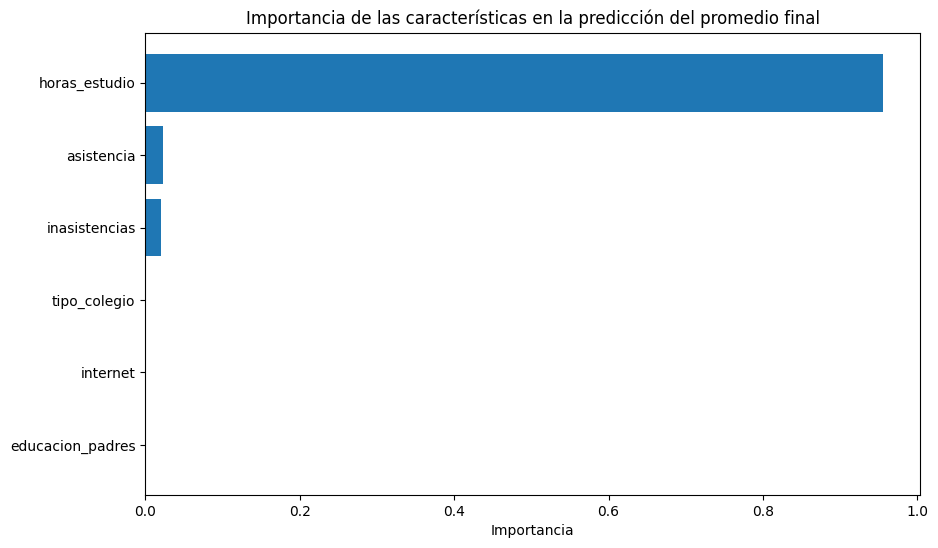

In [ ]:
# Análisis de importancia de características
importancia_caracteristicas = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': modelo_educacion.feature_importances_
}).sort_values('Importancia', ascending=False)

print("Importancia de cada característica en la predicción:")
print(importancia_caracteristicas)

# Gráfico de importancia
plt.figure(figsize=(10, 6))
plt.barh(importancia_caracteristicas['Característica'], importancia_caracteristicas['Importancia'])
plt.xlabel('Importancia')
plt.title('Importancia de las características en la predicción del promedio final')
plt.gca().invert_yaxis()
plt.show()